### Importing Libraries and Data

In [74]:
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [75]:

data = pd.read_csv("../data/SMSSpamCollection.tsv", names=['label', 'body_text'], sep='\t')

data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [43]:
data.rename(columns={"body_text":"email"} , inplace=True)

In [44]:
data.head()

,label,email
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [45]:
data['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

/Users/aziiz/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

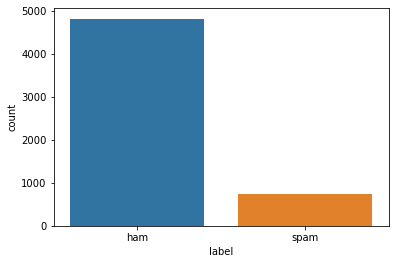

In [46]:
sns.countplot(data['label'])

### Preprocessing Data

In [47]:

def lower_text(row):

    return row.lower()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100


def clean_text(text):
    tokens = re.split('\W+', text)
    text = " ".join(word  for word in tokens  if word not in string.punctuation)
    return text

In [48]:
data["email"] = data["email"].apply(lower_text)

In [49]:
data["email"] = data["email"].apply(clean_text)


In [50]:
data

,label,email
0,ham,i ve been searching for the right words to tha...
1,spam,free entry in 2 a wkly comp to win fa cup fina...
2,ham,nah i don t think he goes to usf he lives arou...
3,ham,even my brother is not like to speak with me t...
4,ham,i have a date on sunday with will
...,...,...
5563,spam,this is the 2nd time we have tried 2 contact u...
5564,ham,will ü b going to esplanade fr home
5565,ham,pity was in mood for that so any other suggest...
5566,ham,the guy did some bitching but i acted like i d...


In [51]:
data["label"] = data["label"].map(lambda  i : 1 if i=="spam" else 0)

In [52]:
data

,label,email
0,0,i ve been searching for the right words to tha...
1,1,free entry in 2 a wkly comp to win fa cup fina...
2,0,nah i don t think he goes to usf he lives arou...
3,0,even my brother is not like to speak with me t...
4,0,i have a date on sunday with will
...,...,...
5563,1,this is the 2nd time we have tried 2 contact u...
5564,0,will ü b going to esplanade fr home
5565,0,pity was in mood for that so any other suggest...
5566,0,the guy did some bitching but i acted like i d...


### Split into train/test

In [60]:
from sklearn.model_selection import train_test_split

X=data[['email']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Vectorize text

In [61]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['email'])

X_train_vect = tfidf_vect_fit.transform(X_train['email'])
X_test_vect = tfidf_vect_fit.transform(X_test['email'])

 
X_train = pd.DataFrame(X_train_vect.toarray())
X_test = pd.DataFrame(X_test_vect.toarray())
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.533247,0.0,0.089056,0.083287,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.071165,0.055827,0.039702,0.0,0.037044,0.0,0.0,0.0,0.0,0.0
1,0.707720,0.0,0.000000,0.068610,0.0,0.074722,0.0,0.0,0.0,0.0,...,0.087936,0.000000,0.196232,0.0,0.091546,0.0,0.0,0.0,0.0,0.0
2,0.604852,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.302706,0.000000,0.067550,0.0,0.063027,0.0,0.0,0.0,0.0,0.0
3,0.587494,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.078405,0.000000,0.174963,0.0,0.163248,0.0,0.0,0.0,0.0,0.0
4,0.487561,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.292808,0.229700,0.163352,0.0,0.304828,0.0,0.0,0.0,0.0,0.0


### Final evaluation of models

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [67]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)



In [77]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [72]:

precision, recall, fscore, train_support = score(y_test, y_pred, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))



Precision: 0.969 / Recall: 0.832 / F1-Score: 0.895 / Accuracy: 0.974


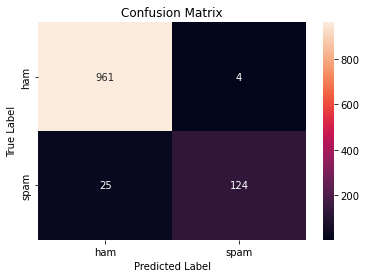

In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [76]:
# Here we save the model into models 

joblib.dump(rf_model , "../models/my_model.joblib")

['../models/my_model.joblib']